In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Book Recommendation System
- Amazon Kindle
- Barnes and Noble and the Nook 
- Goodreads

## Goodreads API
- All Python wrappers have been abandoned
- The Documentation is useless (it is a list of methods without any explanation)
- Ultimately, not a good API

## Book-Crossing Dataset
- Collected by Cai-Nicolas Ziegler in a 4-week crawl
- SQL or CSV file

Three datasets: Book information, Ratings, and User information

In [3]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\veena\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [4]:
users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

In [5]:
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [6]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
books.drop(["imageUrlS", "imageUrlM", "imageUrlL"], axis=1, inplace=True)

In [8]:
books.ISBN.unique()
books["yearOfPublication"].astype("str", inplace=True)
type(books["yearOfPublication"])
books.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [9]:
books.loc[books.yearOfPublication == "DK Publishing Inc"]  

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [10]:
books.drop(209538, axis=0, inplace=True)
books.drop(221678, axis=0, inplace=True)

In [11]:
books.loc[books.yearOfPublication == "Gallimard"]  

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [12]:
books.drop(220731, axis=0, inplace=True)

In [13]:
books["publisher"].fillna("other", inplace=True)

In [15]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
for ages in users["Age"]: 
    if ages > 90 or ages < 5: 
        users["Age"].replace(ages, np.nan)

In [17]:
users["Age"].fillna(users["Age"].mean(), inplace=True)
users["Age"] = users["Age"].astype("int32")
users.index = users["userID"]
users.drop("userID", axis=1, inplace=True)
users.head()

,Location,Age
userID,,
1,"nyc, new york, usa",34
2,"stockton, california, usa",18
3,"moscow, yukon territory, russia",34
4,"porto, v.n.gaia, portugal",17
5,"farnborough, hants, united kingdom",34


In [18]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [19]:
combined_rating_books = pd.merge(ratings, books, on="ISBN")
combined_rating_books.drop(["bookAuthor", "yearOfPublication", "publisher"], axis=1, inplace=True)
combined_rating_books.head()

,userID,ISBN,bookRating,bookTitle
0,276725,034545104X,0,Flesh Tones: A Novel
1,2313,034545104X,5,Flesh Tones: A Novel
2,6543,034545104X,0,Flesh Tones: A Novel
3,8680,034545104X,5,Flesh Tones: A Novel
4,10314,034545104X,9,Flesh Tones: A Novel


In [20]:
totalRatings = combined_rating_books.groupby(by=["bookTitle"])["bookRating"].count().reset_index()
totalRatings.head()

,bookTitle,bookRating
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [21]:
import seaborn as sns

C:\Users\veena\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


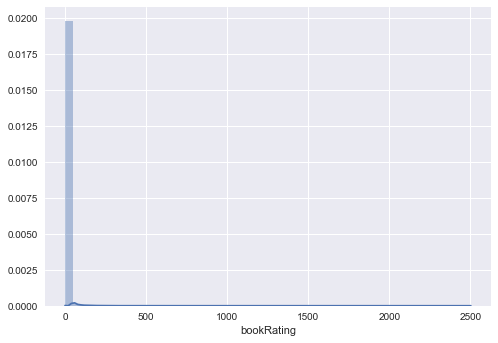

In [22]:
sns.distplot(totalRatings["bookRating"])
plt.show()

In [23]:
# bookRating_x = totalRating number to measure popularity
# bookRating_y = actual rating made by user

combined_totalRating = pd.merge(totalRatings, combined_rating_books, left_on = "bookTitle", right_on="bookTitle")
combined_totalRating.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y
0,A Light in the Storm: The Civil War Diary of ...,4,18995,0590567330,0
1,A Light in the Storm: The Civil War Diary of ...,4,35859,0590567330,0
2,A Light in the Storm: The Civil War Diary of ...,4,55927,0590567330,0
3,A Light in the Storm: The Civil War Diary of ...,4,96448,0590567330,9
4,Always Have Popsicles,1,172742,0964147726,0


In [23]:
"""
combined_totalRating.drop(combined_totalRating.loc[combined_totalRating["bookRating_x"] < 10], axis=1, inplace=True)
combined_totalRating.head()
"""

""
0
1
2
3
4


In [24]:
less_than_10 = combined_totalRating["bookRating_x"] > 20
combined_totalRating["bish"] = less_than_10

In [25]:
combined_totalRating.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y,bish
0,A Light in the Storm: The Civil War Diary of ...,4,18995,0590567330,0,False
1,A Light in the Storm: The Civil War Diary of ...,4,35859,0590567330,0,False
2,A Light in the Storm: The Civil War Diary of ...,4,55927,0590567330,0,False
3,A Light in the Storm: The Civil War Diary of ...,4,96448,0590567330,9,False
4,Always Have Popsicles,1,172742,0964147726,0,False


In [26]:
combined_totalRating = combined_totalRating[less_than_10]
combined_totalRating.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y,bish
207,'Salem's Lot,47,8936,067103975X,0,True
208,'Salem's Lot,47,172245,067103975X,0,True
209,'Salem's Lot,47,189835,067103975X,5,True
210,'Salem's Lot,47,9226,0451168089,0,True
211,'Salem's Lot,47,33283,0451168089,10,True


In [27]:
combined_totalRating.drop(["bish"], axis=1, inplace=True)

In [28]:
combined_totalRating.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y
207,'Salem's Lot,47,8936,067103975X,0
208,'Salem's Lot,47,172245,067103975X,0
209,'Salem's Lot,47,189835,067103975X,5
210,'Salem's Lot,47,9226,0451168089,0
211,'Salem's Lot,47,33283,0451168089,10


In [31]:
combined_totalRating_user = pd.merge(combined_totalRating, users, left_on = "userID", right_on="userID", how="left")
combined_totalRating_user.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y,Location,Age
0,'Salem's Lot,47,8936,067103975X,0,"elizabeth city, north carolina, usa",18
1,'Salem's Lot,47,172245,067103975X,0,"mt pleasent, south carolina, usa",28
2,'Salem's Lot,47,189835,067103975X,5,"honolulu, hawaii, usa",34
3,'Salem's Lot,47,9226,0451168089,0,"kapolei, hawaii, usa",27
4,'Salem's Lot,47,33283,0451168089,10,"winnipeg, manitoba, canada",26


In [32]:
combined_onlyUS = combined_totalRating_user[combined_totalRating_user["Location"].str.contains("usa")]
combined_onlyUS.head()

,bookTitle,bookRating_x,userID,ISBN,bookRating_y,Location,Age
0,'Salem's Lot,47,8936,067103975X,0,"elizabeth city, north carolina, usa",18
1,'Salem's Lot,47,172245,067103975X,0,"mt pleasent, south carolina, usa",28
2,'Salem's Lot,47,189835,067103975X,5,"honolulu, hawaii, usa",34
3,'Salem's Lot,47,9226,0451168089,0,"kapolei, hawaii, usa",27
8,'Salem's Lot,47,59727,0451168089,0,"plano, texas, usa",24


In [50]:
len(combined_onlyUS)

334818

In [33]:
from sklearn.neighbors import NearestNeighbors

In [40]:
combined_pivottable = combined_onlyUS.pivot(index="ISBN", columns = "userID", values="bookRating_y").fillna(0)
combined_pivottable.head()

userID,9,14,16,17,23,26,32,39,42,44,...,278824,278828,278831,278832,278836,278838,278843,278844,278851,278854
ISBN,,,,,,,,,,,,,,,,,,,,,
0002258366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006179223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000649840X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000651202x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0006548539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# K NEAREST NEIGHBORS

from scipy.sparse import csr_matrix

In [ ]:
combined_matrix = csr_matrix(combined_pivottable.values)

In [50]:
model = NearestNeighbors(metric="cosine", algorithm="brute")
model.fit(combined_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [ ]:
query_index = np.random.choice(combined_pivottable.shape[0])
dist, ind = model.kneighbors(combined_pivottable.iloc[query_index, :].values.reshape(1,-1), n_neighbors = 6)

In [ ]:
distances_flattened = dist.flatten()
distances_flattened

In [60]:
for i in range(len(distances_flattened)):
    if i == 0: 
        print("Recommended for {0} \n".format(combined_pivottable.index[query_index]))
    else: 
        print("{0}: {1}", format(str(i), combined_onlyUS.index[ind.flatten()[i]]) )

Recommended for 0553234714 



TypeError: format() argument 2 must be str, not numpy.int64